<a href="https://colab.research.google.com/github/nimishwork6699/Scikit-Learn/blob/main/Project_California_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import os
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
import pickle

# Importing Boston House data


In [10]:
data=fetch_california_housing()

In [11]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [17]:
 df=pd.DataFrame(data.data,columns=data.feature_names)
 df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
data.target_names

['MedHouseVal']

In [20]:
df['MedHouseVal']=data.target

In [21]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13985,1.8958,28.0,4.782178,1.042079,1156.0,2.861386,34.68,-117.28,0.55600
10731,6.6544,44.0,6.681818,1.058824,910.0,2.433155,33.59,-117.87,5.00001
10769,4.1372,33.0,4.911202,1.072404,1621.0,2.214481,33.66,-117.89,2.65200
18540,3.1932,51.0,5.350993,1.238411,608.0,2.013245,36.93,-122.00,4.00000
16580,2.1424,30.0,4.927835,1.162371,1065.0,2.744845,37.75,-121.43,1.25000


In [22]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


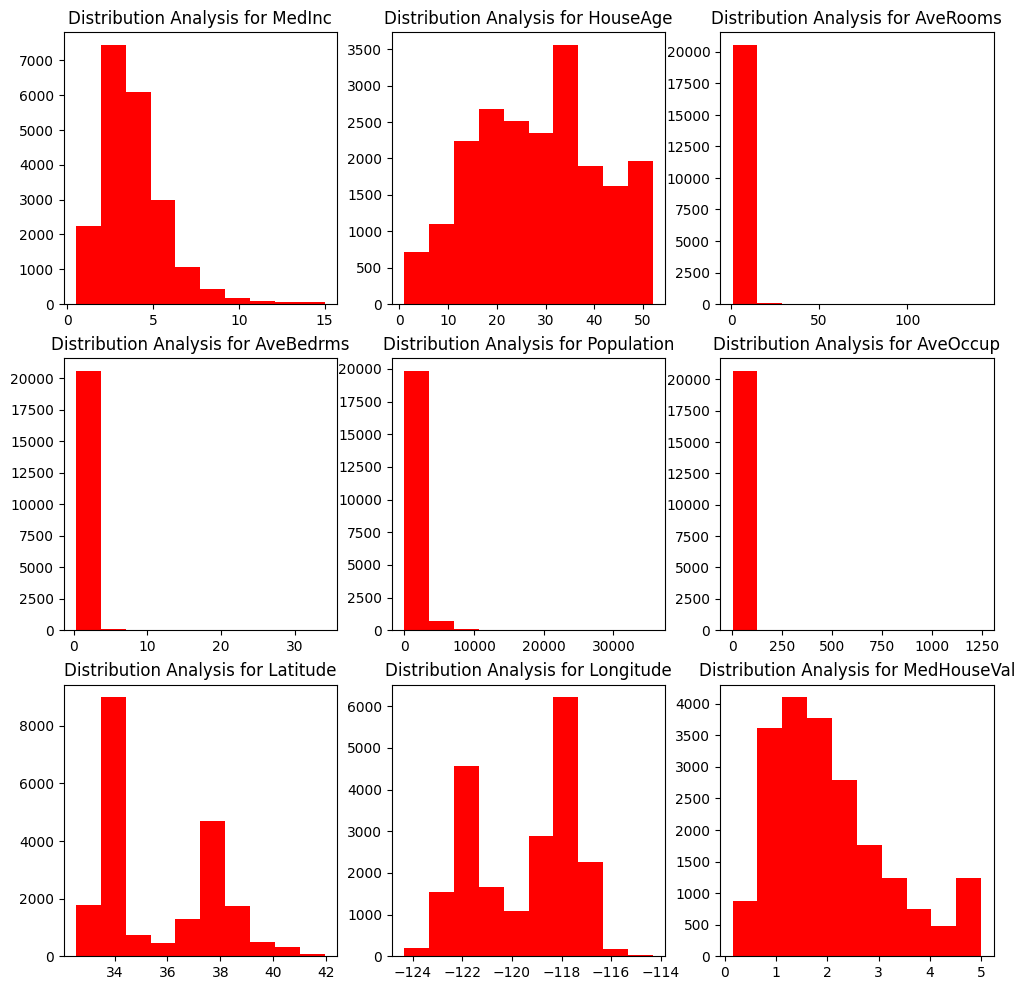

In [24]:
plt.figure(figsize=(12,12))
for i in range(len(df.columns)):
  plt.subplot(3,3,i+1)
  plt.title(f'Distribution Analysis for {df.columns[i]}')
  plt.hist(df[df.columns[i]],color='r')

plt.show()


<Axes: >

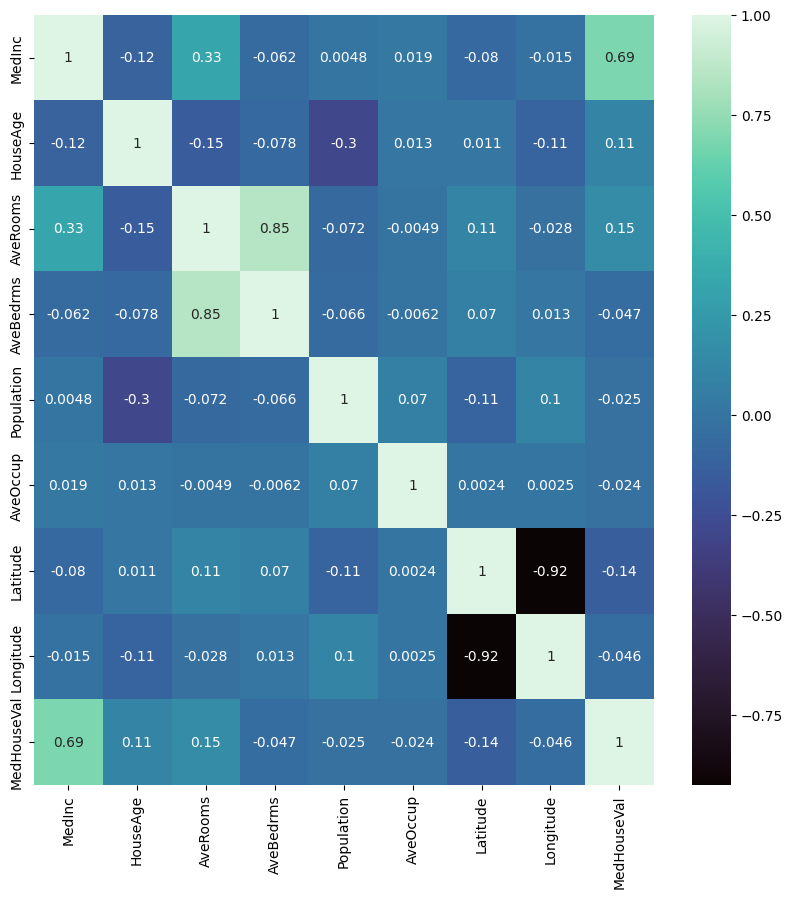

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='mako')

In [47]:
X=df.iloc[:,:-2]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43


In [63]:
y=df['MedHouseVal']
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [64]:
#Min Max For only 0 & 1

In [65]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_X,columns=X.columns)
scaled_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293
...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200


In [66]:
scaled_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model building

In [72]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.2)

In [73]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [74]:
y_pred=model.predict(X_test)

In [75]:
compare_df=pd.DataFrame({'Actual Y':y_test,'Predicted Y':y_pred})
compare_df

,Actual Y,Predicted Y
13321,0.91800,1.246957
10416,2.19000,2.707789
19522,1.87500,0.630505
7705,2.53500,2.369552
3502,1.58100,2.231619
...,...,...
9022,5.00001,2.453883
520,2.89900,2.914817
14762,0.67500,0.798262
329,0.79700,1.377036


# Model Evaluation

In [76]:
model.score(X_test,y_test)

0.5568684523471196

In [78]:
mae=metrics.mean_absolute_error(y_test,y_pred)
print("Mean error",mae)

Mean error 0.5737495748669814


In [79]:
mse=metrics.mean_squared_error(y_test,y_pred)
print("Mean error",mse)

Mean error 0.5986920137636829


In [82]:
with open('chatgpt_for_house.pkl','wb')as f:
  pickle.dump(model,f)
print("Model Saved")

Model Saved
